In [0]:
import pandas as pd

In [0]:
import tensorflow as tf
import sys
from keras.utils import np_utils
import numpy as np
from sklearn import model_selection
from scipy.spatial.distance import cdist
from tensorflow.python.keras.models import Sequential,load_model
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.layers import LSTM,Dense,GRU,Embedding,SpatialDropout1D
import pandas as pd

In [0]:
sentiment_df=pd.read_csv('sentiment.tsv',delimiter='\t',encoding='utf-8',names=["Sentiment", "Tweets"])

In [180]:
sentiment_df.head()

,Sentiment,Tweets
0,neg,"@jamielewislewis i cant believe it, it really ..."
1,pos,having a vodka tonic and looking forward to go...
2,pos,@ddlovatofans1neg1 Could you follow me please....
3,pos,@jordanknight for once.................. PLEAS...
4,neg,Had a dream about a walk in fast food resturau...


In [0]:
import csv
import nltk as nlp
from nltk import word_tokenize
import string
import os
import re
import io

In [0]:
def clean(text):
    #print(type(text))
    text = text.lower()
    printable = set(string.printable)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    return text

In [183]:
clean("saca")

'saca'

In [0]:
sentiment=sentiment_df["Sentiment"]
sentiment_text=sentiment_df["Tweets"]=[clean(txt) for txt in sentiment_df["Tweets"]]

In [185]:
sentiment_df.head()

,Sentiment,Tweets
0,neg,jamielewislewis i cant believe it it really d...
1,pos,having a vodka tonic and looking forward to go...
2,pos,ddlovatofans1neg1 could you follow me please ...
3,pos,jordanknight for once please tell us why u we...
4,neg,had a dream about a walk in fast food resturau...


In [196]:
num_words=100
#Tokenize the text
tokenize=Tokenizer(num_words=num_words)
tokenize.fit_on_texts(sentiment_text)
idx=tokenize.word_index
x_token=tokenize.texts_to_sequences(sentiment_text)

#Find max tokens 
num_tokens=[len(token) for token in x_token]
num_tokens=np.array(num_tokens)
max_tokens=np.mean(num_tokens)+2*np.std(num_tokens)
max_tokens=int(max_tokens)
print("Max Tokens")
print(max_tokens)
#print(tr_label)

#Classes
classes={u'neg':0,u'pos':1}
classesa=['pos','neg']

#One Hot encoding of labels
labrl=[classes[leb] for leb in sentiment]
senti = np_utils.to_categorical(labrl, 2)

#Adding padding to the training data
pad='pre'
x_tweet_seq=pad_sequences(x_token,maxlen=max_tokens,padding=pad,truncating=pad)

#embedding_size=8
#emb_dim = 128

reuse_word = 100


Max Tokens
14


In [187]:
x_tweet_seq[0]

array([ 1,  7,  7, 56, 88,  1, 96,  7,  7, 44, 23, 38, 77,  8],
      dtype=int32)

In [0]:
X=x_tweet_seq
Y=senti

In [189]:
len(Y)

2001

In [190]:
len(lr_probs[:, 1])

2001

In [0]:
from numpy import interp

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [0]:
tprs=[]
aucs=[]
i=1

In [0]:
import matplotlib.pyplot as plt

In [197]:

mean_fpr = np.linspace(0,1,100)
n_split=10
cvscores = []
for train, test in KFold(n_split).split(X,Y):
  model = Sequential()
  model.add(Embedding(reuse_word, 64, input_length=max_tokens))
  model.add(LSTM(64, dropout=0.2))
  model.add(Dense(2, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(X[train], Y[train], epochs=40,batch_size=10,verbose=0)
  scores = model.evaluate(X[test], Y[test])
  predict=model.predict_proba(X[test])
  fpr, tpr, t = roc_curve(Y[test].argmax(axis=1), np.round((predict[:, 1])))
  tprs.append(interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  i= i+1



200/200 [==============================] - 2s 11ms/sample - loss: 1.0531 - acc: 0.6200


In [0]:
len(Y[test].argmax(axis=1))

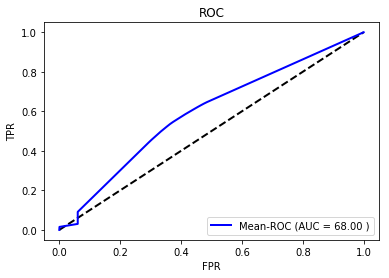

[1.0530639600753784, 0.62]


In [215]:
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean-ROC (AUC = %0.2f )' % (n_auc),lw=2, alpha=1)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")

plt.show()
print(scores)

In [0]:
x_train_pad[1]

In [0]:
model.predict(x_test_pad)[1]

In [0]:
x_test_pad[1800]

In [0]:
ind = np.unravel_index(np.argmax(model.predict(x_test_pad)[1], axis=None), model.predict(x_test_pad)[1].shape)

In [0]:
ind